In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [19]:
df = pd.read_csv('Sales Dataset.csv')
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


Dataset ini biasanya digunakan untuk menganalisis dan memprediksi pola transaksi penjualan berdasarkan sejumlah fitur yang tersedia. Meskipun konteks penggunaannya bisa bervariasi (termasuk prediksi biaya asuransi dalam beberapa kasus), dalam studi ini dataset digunakan untuk mengklasifikasikan kategori produk (Category) berdasarkan fitur-fitur penjualan. Dataset terdiri dari beberapa kolom yang mewakili berbagai atribut, antara lain:
*   Order ID: ID unik untuk setiap transaksi.
*   Amount: Jumlah pembayaran dari suatu transaksi.
*   Profit: Keuntungan yang diperoleh dari transaksi tersebut.
*   Quantity: Jumlah item yang dibeli.
*   Category: Jenis kategori produk (target klasifikasi).
*  Sub-Category: Subkategori produk.
PaymentMode: Metode pembayaran yang digunakan pelanggan.
*   Order Date: Tanggal pemesanan dilakukan.
*   CustomerName: Nama pelanggan.
*   State: Negara bagian tempat pemesanan dilakukan.
*   City: Kota tempat pelanggan berada.
*   Year-Month: Informasi waktu dalam format tahun-bulan.

Dalam analisis ini, digunakan 4 fitur utama (Amount, Profit, Quantity, dan PaymentMode) untuk memprediksi kolom Category menggunakan algoritma klasifikasi seperti Naive Bayes dan K-Nearest Neighbors (KNN).

In [4]:
df.tail()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
1189,B-26370,8825,3594,15,Furniture,Tables,Debit Card,2024-07-31,Megan Mclean,New York,New York City,2024-07
1190,B-26298,2082,642,8,Electronics,Phones,EMI,2020-06-02,Caitlin Hunt,New York,Rochester,2020-06
1191,B-26298,2082,642,8,Electronics,Phones,EMI,2022-12-15,Jenna Holland,Texas,Austin,2022-12
1192,B-26298,2082,642,8,Electronics,Phones,EMI,2020-08-07,Stephanie Oconnell,New York,Buffalo,2020-08
1193,B-25068,914,163,13,Office Supplies,Markers,UPI,2024-10-26,Andrea Hill,Illinois,Chicago,2024-10


Dataset ini memiliki 1193 pengamatan

#**PREPROCESSING DATA**

In [5]:
features = ['Amount', 'Profit', 'Quantity', 'PaymentMode', 'Sub-Category', 'State']
target = 'Category'
df_model = df[features + [target]].copy()

6 fitur utama dan 1 kolom target (Category) yang akan digunakan untuk klasifikasi.

In [6]:
from sklearn.preprocessing import LabelEncoder

le_dict = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le

StandardScaler mengubah semua fitur numerik ke skala yang sama (mean = 0, std = 1).

Ini sangat penting untuk algoritma seperti KNN yang sensitif terhadap skala.

In [7]:
from sklearn.preprocessing import StandardScaler

X = df_model.drop(columns=[target])
y = df_model[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print(df['Category'].value_counts())

Category
Furniture          407
Office Supplies    399
Electronics        388
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Data dibagi menjadi:

80% untuk pelatihan (training)

20% untuk pengujian (testing)

#**Model Naive Bayes**

Akurasi KNN : 0.72


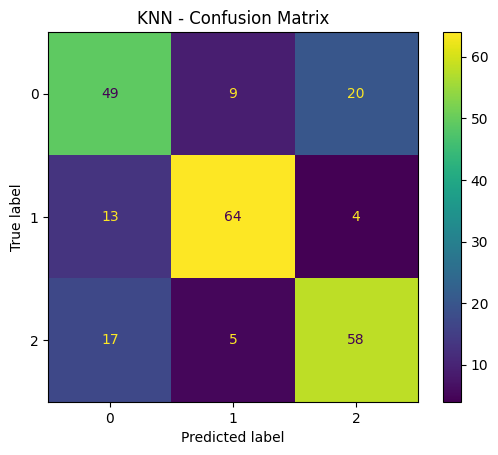

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(3, 15))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

best_knn = grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN : {acc_knn:.2f}")

# Calculate the confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Use cm_knn instead of cm_nb in ConfusionMatrixDisplay
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("KNN - Confusion Matrix") # Changed title to reflect KNN
plt.show()

Membuat model Naive Bayes (GaussianNB)

Melatih model dengan data training

Menggunakan model untuk memprediksi hasil dari data uji

#**Model K-Nearest Neighbors (KNN)**

Akurasi Naive Bayes: 0.48


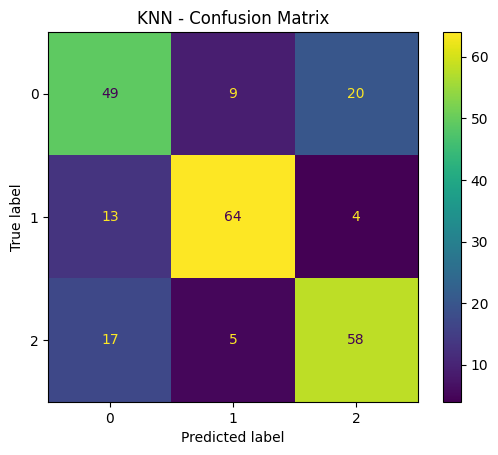

In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {acc_nb:.2f}")

# Visualisasi confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title("KNN - Confusion Matrix")
plt.show()

Membuat model KNN dengan k = 5

Melatih model dan melakukan prediksi seperti sebelumnya

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Akurasi KNN : {acc_knn:.2f}")

acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Akurasi Naive Bayes: {acc_nb:.2f}")

Akurasi KNN : 0.72
Akurasi Naive Bayes: 0.48


**Kesimpulan Analisis Klasifikasi pada Sales Dataset**

Pada analisis ini digunakan dua algoritma klasifikasi, yaitu Naive Bayes dan K-Nearest Neighbors (KNN), untuk memprediksi kategori produk (Category) berdasarkan enam fitur: Amount, Profit, Quantity, PaymentMode, Sub-Category, dan State.

Hasil Evaluasi Model:
Naive Bayes menghasilkan akurasi sebesar 48%

K-Nearest Neighbors (KNN) menghasilkan akurasi sebesar 72%

Analisis:
Akurasi Naive Bayes masih tergolong rendah, mengindikasikan bahwa model ini kurang efektif dalam menangkap pola data, kemungkinan fitur-fitur yang digunakan mungkin belum cukup kuat atau representatif untuk memprediksi target Category secara akurat.
Sebaliknya, KNN memberikan hasil yang jauh lebih baik, menunjukkan bahwa metode berbasis tetangga lebih cocok untuk distribusi dan struktur data pada dataset ini.